# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/agateboy/datasetmlpemula/refs/heads/main/Dataset_clustering.csv")
df.head()

,id,Name,Price,City,ShopName,Rating,Rating Average,Total Reviews,Sold,Income,Link
0,7891351022,promo robo tartufo tartufata truffle paste arm...,399945,Jakarta Barat,zamzam-shop,5,5.0,3,3,1199835,https://www.tokopedia.com/zamzam-shop-1/promo-...
1,2179412428,Italian Sliced Summer truffle Slice Slices In ...,399000,Jakarta Utara,Daporpedia,5,5.0,21,21,8379000,https://www.tokopedia.com/daporpedia/italian-s...
2,100442895,Jamur Aspergillus niger (Fermentasi Asam Sitra...,385000,Kab. Bogor,Nanobio Laboratory,5,4.8,10,10,3850000,https://www.tokopedia.com/nanobio-lab/jamur-as...
3,13122009034,trivelli tartufi truffle sauce 500 gr/saus jam...,385000,Jakarta Selatan,Classy's storee,5,5.0,7,7,2695000,https://www.tokopedia.com/classys/trivelli-tar...
4,489135402,Jamur Kecap / Koji / Aspergillus Oryzae,385000,Kab. Bogor,Nanobio Laboratory,5,4.7,13,13,5005000,https://www.tokopedia.com/nanobio-lab/jamur-ke...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2704 non-null   int64  
 1   Name            2704 non-null   object 
 2   Price           2704 non-null   int64  
 3   City            2704 non-null   object 
 4   ShopName        2704 non-null   object 
 5   Rating          2704 non-null   int64  
 6   Rating Average  2704 non-null   float64
 7   Total Reviews   2704 non-null   int64  
 8   Sold            2704 non-null   int64  
 9   Income          2704 non-null   int64  
 10  Link            2704 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 232.5+ KB


In [20]:
df.describe()

,id,Price,Rating,Rating Average,Total Reviews,Sold,Income
count,2.704000e+03,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2.704000e+03
mean,4.507662e+09,42241.495932,4.819527,4.766790,150.428624,150.428624,5.170012e+06
std,4.445155e+09,53399.294717,0.907878,0.900778,495.244405,495.244405,1.941184e+07
min,1.965761e+07,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.246953e+09,13000.000000,5.000000,4.900000,8.000000,8.000000,1.936500e+05
50%,2.131112e+09,24800.000000,5.000000,5.000000,33.000000,33.000000,8.250000e+05
75%,7.323225e+09,48500.000000,5.000000,5.000000,118.000000,118.000000,3.000000e+06
max,1.549696e+10,399945.000000,5.000000,5.000000,13976.000000,13976.000000,3.653676e+08


In [22]:
df.isna().sum()

,0
id,0
Name,0
Price,0
City,0
ShopName,0
Rating,0
Rating Average,0
Total Reviews,0
Sold,0
Income,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

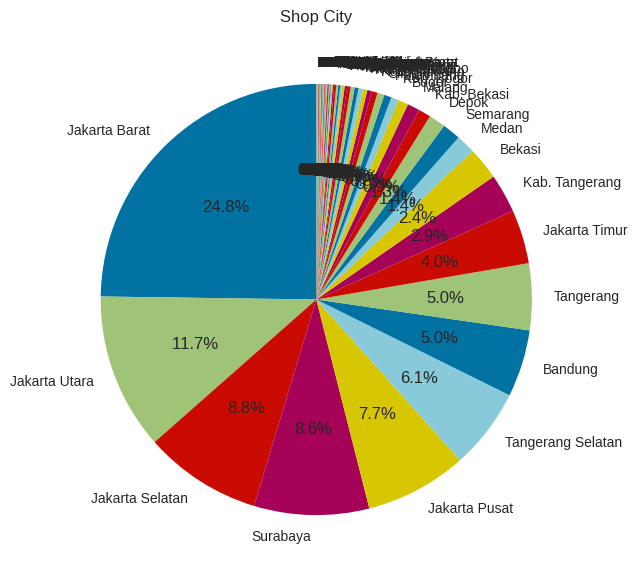

In [23]:
plt.figure(figsize=(7, 7))
plt.pie(df['City'].value_counts(), labels=df['City'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Shop City')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

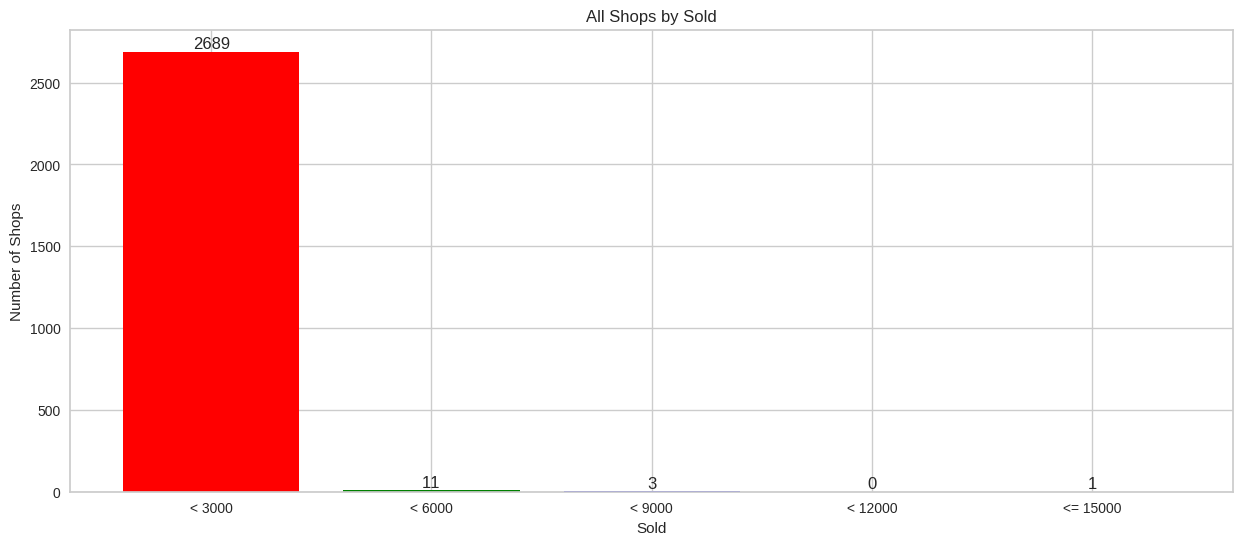

In [24]:
rate0_1 = df.Sold[(df.Sold >= 0) & (df.Sold < 3000)]
rate1_2 = df.Sold[(df.Sold >= 3000) & (df.Sold < 6000)]
rate2_3 = df.Sold[(df.Sold >= 6000) & (df.Sold < 9000)]
rate3_4 = df.Sold[(df.Sold >= 9000) & (df.Sold < 9000)]
rate4_5 = df.Sold[(df.Sold >= 9000) & (df.Sold < 15000)]

# Menyusun data untuk plotting
x = ["< 3000", "< 6000", "< 9000", "< 12000", "<= 15000"]
y = [len(rate0_1.values), len(rate1_2.values), len(rate2_3.values), len(rate3_4.values), len(rate4_5.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("All Shops by Sold")
plt.xlabel("Sold")
plt.ylabel("Number of Shops")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

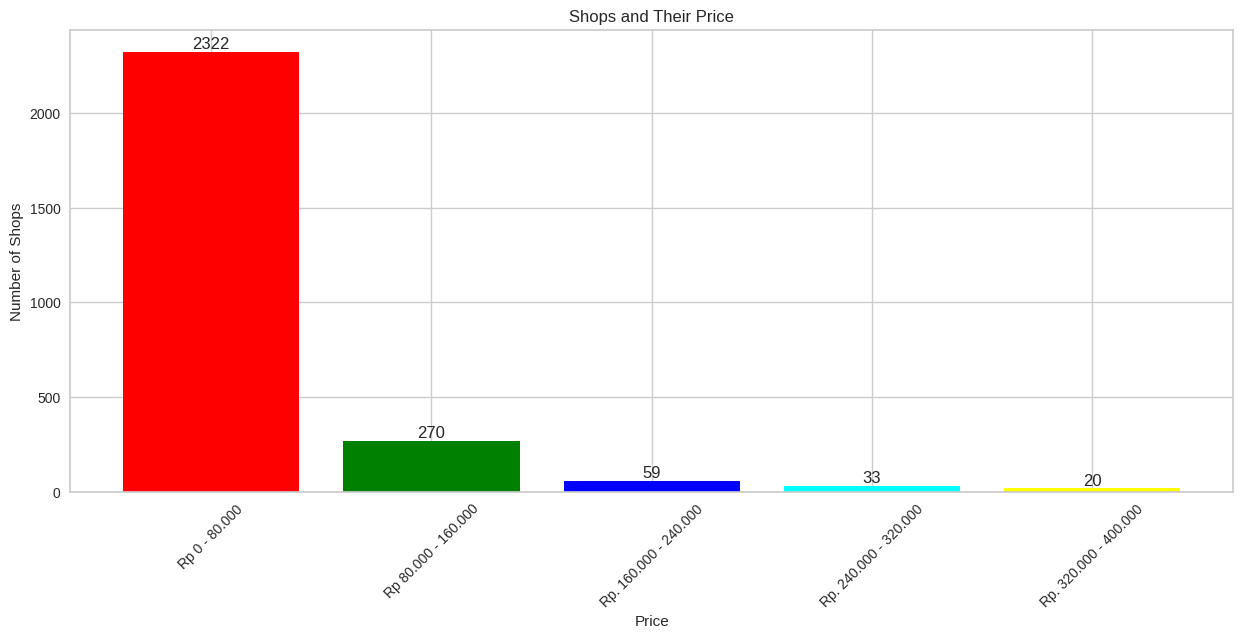

In [25]:
ai_100k = df.Price[(df.Price >= 0) & (df.Price < 80000)]
ai_1000k = df.Price[(df.Price >= 80000) & (df.Price < 160000)]
ai_10jt = df.Price[(df.Price >= 160000) & (df.Price < 240000)]
ai_100jt = df.Price[(df.Price >= 240000) & (df.Price < 320000)]
ai_1m = df.Price[(df.Price >= 320000) & (df.Price <= 400000)]

# Menyusun data untuk plotting
aix = ["Rp 0 - 80.000", "Rp 80.000 - 160.000", "Rp. 160.000 - 240.000", "Rp. 240.000 - 320.000", "Rp. 320.000 - 400.000"]
aiy = [len(ai_100k.values), len(ai_1000k.values), len(ai_10jt.values), len(ai_100jt.values), len(ai_1m.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Shops and Their Price")
plt.xlabel("Price")
plt.ylabel("Number of Shops")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

In [26]:
X = df.iloc[:, [2, 8]].values
print(pd.DataFrame(X, columns=['Price', 'Sold']))

       Price  Sold
0     399945     3
1     399000    21
2     385000    10
3     385000     7
4     385000    13
...      ...   ...
2699     350    47
2700     259     1
2701     240   635
2702     220   297
2703     195     7

[2704 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [27]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

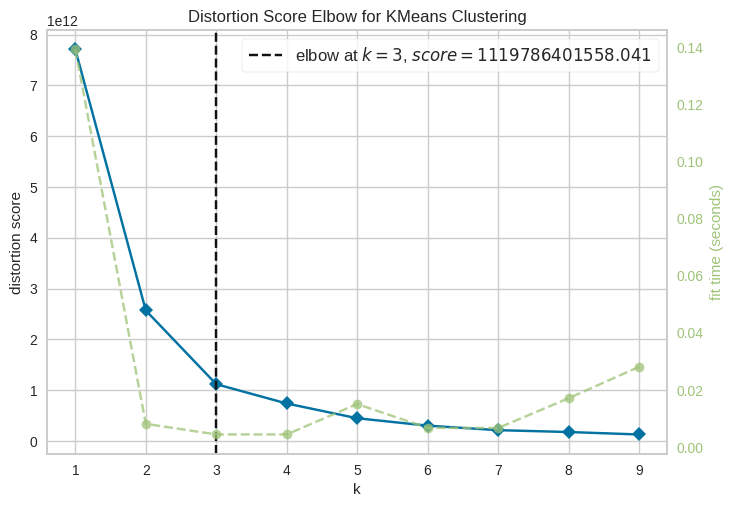

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer.fit(X)
visualizer.show()

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7215686938039665


Terdapat 4 Cluster optimal (n_clusters = 3) dengan silhouette score adalah 0.721. Hal ini menunjukkan bahwa clustering yang dilakukan cukup baik dan objek-objek dalam cluster sangan cocok dengan cluster-nya.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

k = 4

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]
        mean_income = cluster_data[:, 0].mean()
        mean_spending = cluster_data[:, 1].mean()
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Price (Rp): {mean_income:.2f}")
        print(f"Rata-rata Sold (1-15k): {mean_spending:.2f}")
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Price (Rp): 19330.50
Rata-rata Sold (1-15k): 149.41

Cluster 2:
Price (Rp): 159536.35
Rata-rata Sold (1-15k): 66.84

Cluster 3:
Price (Rp): 71121.64
Rata-rata Sold (1-15k): 186.52

Cluster 4:
Price (Rp): 292416.32
Rata-rata Sold (1-15k): 38.68


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

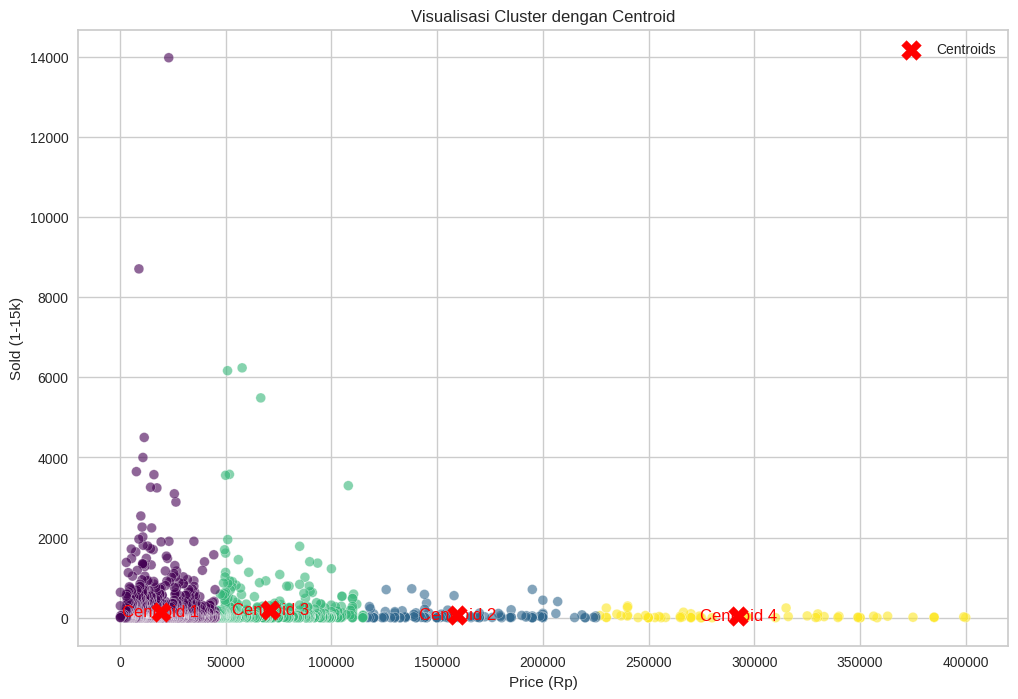

Nilai Centroids:
Centroid 1: Annual Income = 19330.50, Sold = 149.41
Centroid 2: Annual Income = 159536.35, Sold = 66.84
Centroid 3: Annual Income = 71121.64, Sold = 186.52
Centroid 4: Annual Income = 292416.32, Sold = 38.68


In [ ]:
import matplotlib.pyplot as plt

centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Price (Rp)')
plt.ylabel('Sold (1-15k)')
plt.legend()

plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Sold = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
df_normalized = pd.DataFrame(X, columns=['Price', 'Sold'])
df_normalized['Cluster'] = labels
df_normalized

,Price,Sold,Cluster
0,399945,3,3
1,399000,21,3
2,385000,10,3
3,385000,7,3
4,385000,13,3
...,...,...,...
2699,350,47,0
2700,259,1,0
2701,240,635,0
2702,220,297,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Cluster 1:
Statistik Deskriptif:
              Price          Sold
count   1981.000000   1981.000000
mean   19330.496214    149.407370
std    10838.880632    495.382074
min      195.000000      0.000000
25%    10550.000000      9.000000
50%    17000.000000     36.000000
75%    27000.000000    122.000000
max    45000.000000  13976.000000

Cluster 2:
Statistik Deskriptif:
               Price        Sold
count     127.000000  127.000000
mean   159536.346457   66.842520
std     30438.732936  142.575651
min    117000.000000    0.000000
25%    135000.000000    4.000000
50%    150000.000000   11.000000
75%    185000.000000   47.000000
max    225000.000000  722.000000

Cluster 3:
Statistik Deskriptif:
               Price         Sold
count     536.000000   536.000000
mean    71121.636194   186.516791
std     19993.895148   566.847580
min     45300.000000     0.000000
25%     52000.000000     8.000000
50%     67850.000000    36.000000
75%     89000.000000   124.000000
max    115000.000000  6

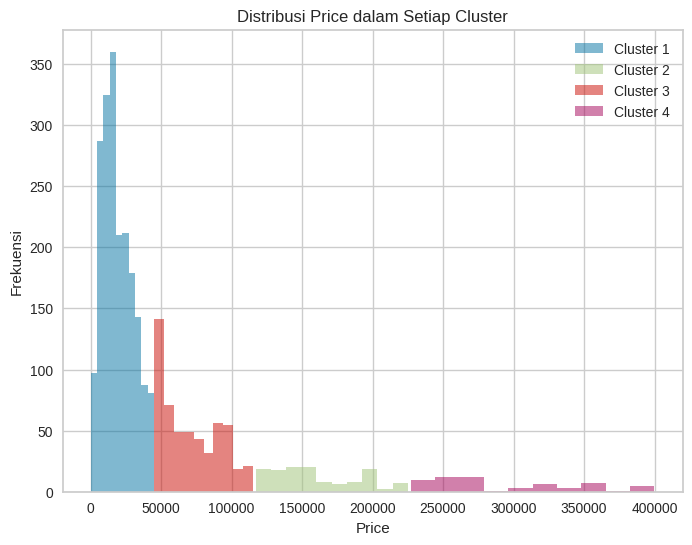

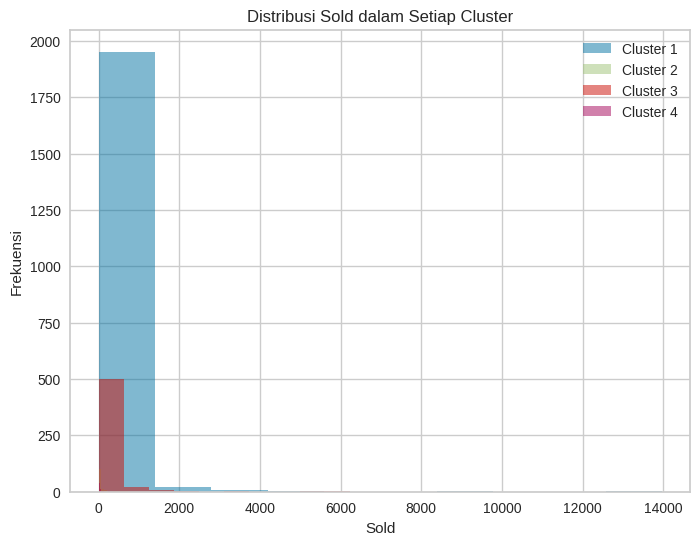

In [ ]:
for cluster_id in range(k):
    cluster_data = df_normalized[df_normalized['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id + 1}:")
    print("Statistik Deskriptif:")
    print(cluster_data[['Price', 'Sold']].describe())

for feature in ['Price', 'Sold']:
    plt.figure(figsize=(8, 6))
    for cluster_id in range(k):
        cluster_data = df_normalized[df_normalized['Cluster'] == cluster_id]
        plt.hist(cluster_data[feature], bins=10, alpha=0.5, label=f'Cluster {cluster_id + 1}')
    plt.title(f'Distribusi {feature} dalam Setiap Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()

Tulis hasil interpretasinya di sini.
1. **Cluster 1**:


*   **Rata-rata Price (Rp)**: 19330.50
*   **Rata-rata Sold (Terjual)**: 149.41
*   **Analisis**: Cluster ini memiliki harga jual paling rendah tetapi menunjukkan penjualannya cukup tinggi. Hal ini menunjukkan bahwa produk dengan harga murah lebih diminati dan memiliki volume penjualan yang tinggi.

2. **Cluster 2**:


*   **Rata-rata Price (Rp)**: 159536.35
*   **Rata-rata Sold (Terjual)**: 66.84
*   **Analisis**: Cluster ini memiliki harga rata-rata menengah tetapi penjualannya relatif lebih rendah dari cluster lainnya. Hal ini memungkinkan bahwa produk pada cluster ini adalah barang yang hanya menarik segmen pasar tertentu.

3. **Cluster 3**:


*   **Rata-rata Price (Rp)**: 71121.64
*   **Rata-rata Sold (Terjual)**: 186.52
*   **Analisis**: Produk pada cluster ini memiliki rata-rata harga yang sedang dan penjualannya paling tinggi, hal ini menunjukkan bahwa produk pada cluster ini memiliki keseimbangan yang baik dan menarik banyak pembeli. Produk pada cluster ini memungkinkan bahwa produk yang populer dan nilainya sebanding dengan harganya.

4. **Cluster 4**:


*   **Rata-rata Price (Rp)**: 292416.32
*   **Rata-rata Sold (Terjual)**: 38.68
*   **Analisis**: Produk pada cluster ini memilki harga tertinggi tetapi penjualannya paling rendah. Hal ini menunjukkan bahwa produk pada cluster ini kemungkinan adalah barang mewah yang hanya dibeli oleh segmen pasar tertentu dan kemungkinan barang overprice.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized.to_csv('Dataset_inisiasi.csv', index=False)